## Homework:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

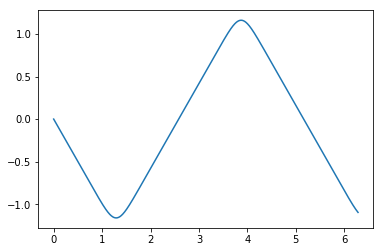

In [2]:
# Let's first try linear force  Fx=-x, then try Fx=, -x**3, -x**5, ..., -x**11

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
%matplotlib inline
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]# finish this line                                            
    fReturn[1] = -y[0]**11# finish this line      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)

p.show()

Computationally, a good way to calculate DFT is
\begin{eqnarray}
Y_{n}&=&\frac{1}{\sqrt{2\pi}}\sum_{k=1}^{N} y_{k}Z^{nk}\\
y_{k}&=&\frac{\sqrt{2\pi}}{N}\sum_{n=1}^{N} Z^{-nk} Y_{n}\quad Z=e^{-2\pi i/N}
\end{eqnarray}


In [4]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            



Np =  1001
N  = 1001
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N

dftz   = zeros( (Np), complex )                  # Complex elements
signal = yp

fplot = np.zeros((Np))
nplot = np.zeros((Np))

def fourier(dftz):       # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += np.exp(-zexpo)* signal[k]         # finish this line
      dftz[n] = zsum * sq2pi  
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
      
fourier(dftz)              # Call signal, transform

(0, 10)

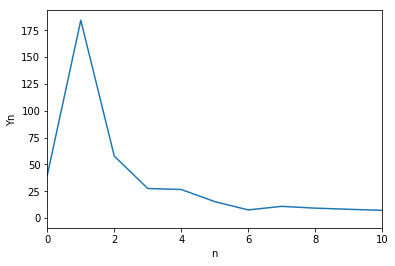

In [5]:
plt.plot(nplot,fplot)
plt.xlabel('n')
plt.ylabel('Yn')
plt.xlim(0,10)

(0, 10)

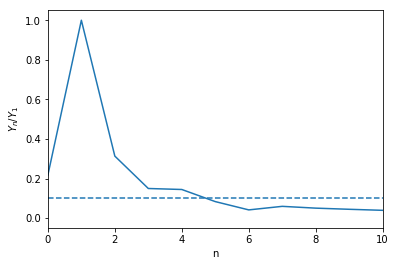

In [6]:
plt.plot(nplot,fplot/fplot[1])
plt.xlabel('n')
plt.ylabel(r'$Y_n/Y_1$')
plt.axhline(0.1, linestyle='--')
plt.xlim(0,10)

In [7]:
# So n =0, 1, 2, 3, 4 are the major components

Computationally, a good way to calculate DFT is
\begin{eqnarray}
Y_{n}&=&\frac{1}{\sqrt{2\pi}}\sum_{k=1}^{N} y_{k}Z^{nk}\\
y_{k}&=&\frac{\sqrt{2\pi}}{N}\sum_{n=1}^{N} Z^{-nk} Y_{n}\quad Z=e^{-2\pi i/N}
\end{eqnarray}

In [8]:
yk = np.zeros(1001, complex)
for k in range(1001):
    for j in range(Np):
        yk[k] += sq2pi/Np * np.exp(complex(0, twopi*k*nplot[j]/Np)) * dftz[j]

/homes/shjzhang/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


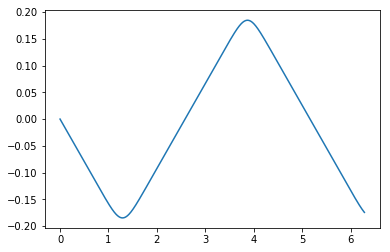

In [9]:
plt.plot(xp, yk)

In [ ]:
# It reproduce the function.